In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r1 = pd.read_stata('R1\\NHATS_Round_1_SP_File.dta')
metro = pd.read_stata('NHATS_Round_1_6_MetNonmet.dta')

r1_metroind = metro[metro['r1dmetnonmet'] == metro['r1dmetnonmet'].cat.categories[1]][['spid','r1dmetnonmet']]

r1_metro = r1.merge(r1_metroind, on = 'spid')

r1_valid = r1_metro[(~r1_metro['hc1health'].isin(['-9 Missing', '-8 DK', '-1 Inapplicable']))].reset_index(drop = True)
r1_valid = r1_valid[r1_valid['is1resptype'] == '1 SAMPLE PERSON (SP)'].reset_index(drop = True)
r1_valid = r1_valid[(r1_valid['hc1disescn2'] == ' 1 YES') | (r1_valid['hc1disescn3'] == ' 1 YES') |
                    (r1_valid['hc1disescn6'] == ' 1 YES')].reset_index(drop = True)

In [75]:
print('ages in nhats:')
print(r1_valid['r1d2intvrage'].value_counts())
print('genders in nhats:')
print(r1_valid['r1dgender'].value_counts())
print('races in nhats:')
print(r1_valid['rl1dracehisp'].value_counts())
print('dualigible in nhats:')
print(r1_valid['ip1cmedicaid'].value_counts())

print('categories:')
print(r1_valid['r1d2intvrage'].cat.categories.values)

print(r1_valid['r1dgender'].cat.categories.values)

print(r1_valid['rl1dracehisp'].cat.categories.values)

print(r1_valid['ip1cmedicaid'].cat.categories.values)

ages in nhats:
2 - 70-74    943
4 - 80-84    877
3 - 75-79    874
1 - 65-69    773
5 - 85-89    510
6 - 90 +     302
Name: r1d2intvrage, dtype: int64
genders in nhats:
2 FEMALE    2528
1 MALE      1751
Name: r1dgender, dtype: int64
races in nhats:
 1 White, non-hispanic                                                                     2717
 2 Black, non-hispanic                                                                     1126
 4 Hispanic                                                                                 278
 3 Other (Am Indian/Asian/Native Hawaiian/Pacific Islander/other specify), non-Hispanic     112
 6 DKRF                                                                                      41
 5 more than one DKRF primary                                                                 5
Name: rl1dracehisp, dtype: int64
dualigible in nhats:
 2 NO              3534
 1 YES              648
-8 DK                93
-7 RF                 4
-1 Inapplicable       0
-9

In [3]:
def defType(row):
    if row['r1d2intvrage'] in ['1 - 65-69','2 - 70-74']:
        age = 1
    else:
        age = 0
    
    if row['r1dgender'] == '1 MALE':
        gender = 1
    else:
        gender = 0
    if row['rl1dracehisp'] == ' 1 White, non-hispanic':
        race = 1
    else:
        race = 0
    if row['ip1cmedicaid'] ==  ' 2 NO':
        dual_eligible = 0
    else:
        dual_eligible = 1
    return age + 2 * gender + 4 * race + 8 * dual_eligible
    
r1_valid['agent_type'] = r1_valid.apply(defType, axis = 1)

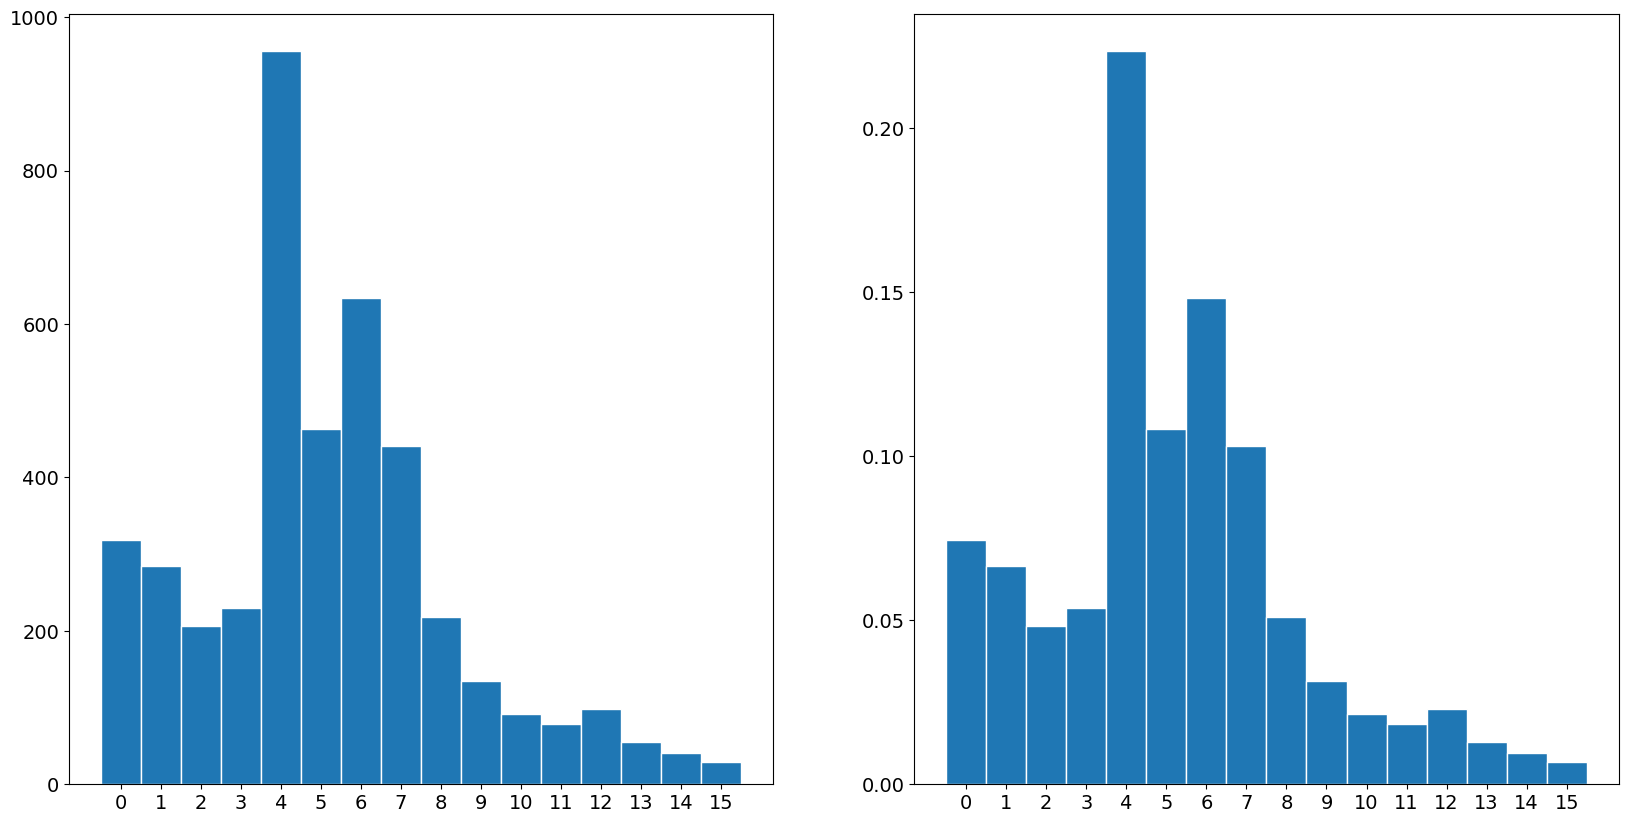

In [141]:
r1_valid['agent_type'].value_counts().sort_index()
value_counts = r1_valid['agent_type'].value_counts().sort_index()
hist(value_counts, 14)

In [142]:
value_counts

0     319
1     285
2     206
3     230
4     956
5     463
6     634
7     441
8     218
9     134
10     91
11     79
12     98
13     55
14     41
15     29
Name: agent_type, dtype: int64

 1 AGREE A LOT         158
 2 AGREE A LITTLE       34
-8 DK                   17
 3 AGREE NOT AT ALL      8
-7 RF                    1
-1 Inapplicable          0
-9 Missing               0
Name: wb1agrwstmt2, dtype: int64
 1 AGREE A LOT         0.724771
 2 AGREE A LITTLE      0.155963
-8 DK                  0.077982
 3 AGREE NOT AT ALL    0.036697
-7 RF                  0.004587
-1 Inapplicable        0.000000
-9 Missing             0.000000
Name: wb1agrwstmt2, dtype: float64


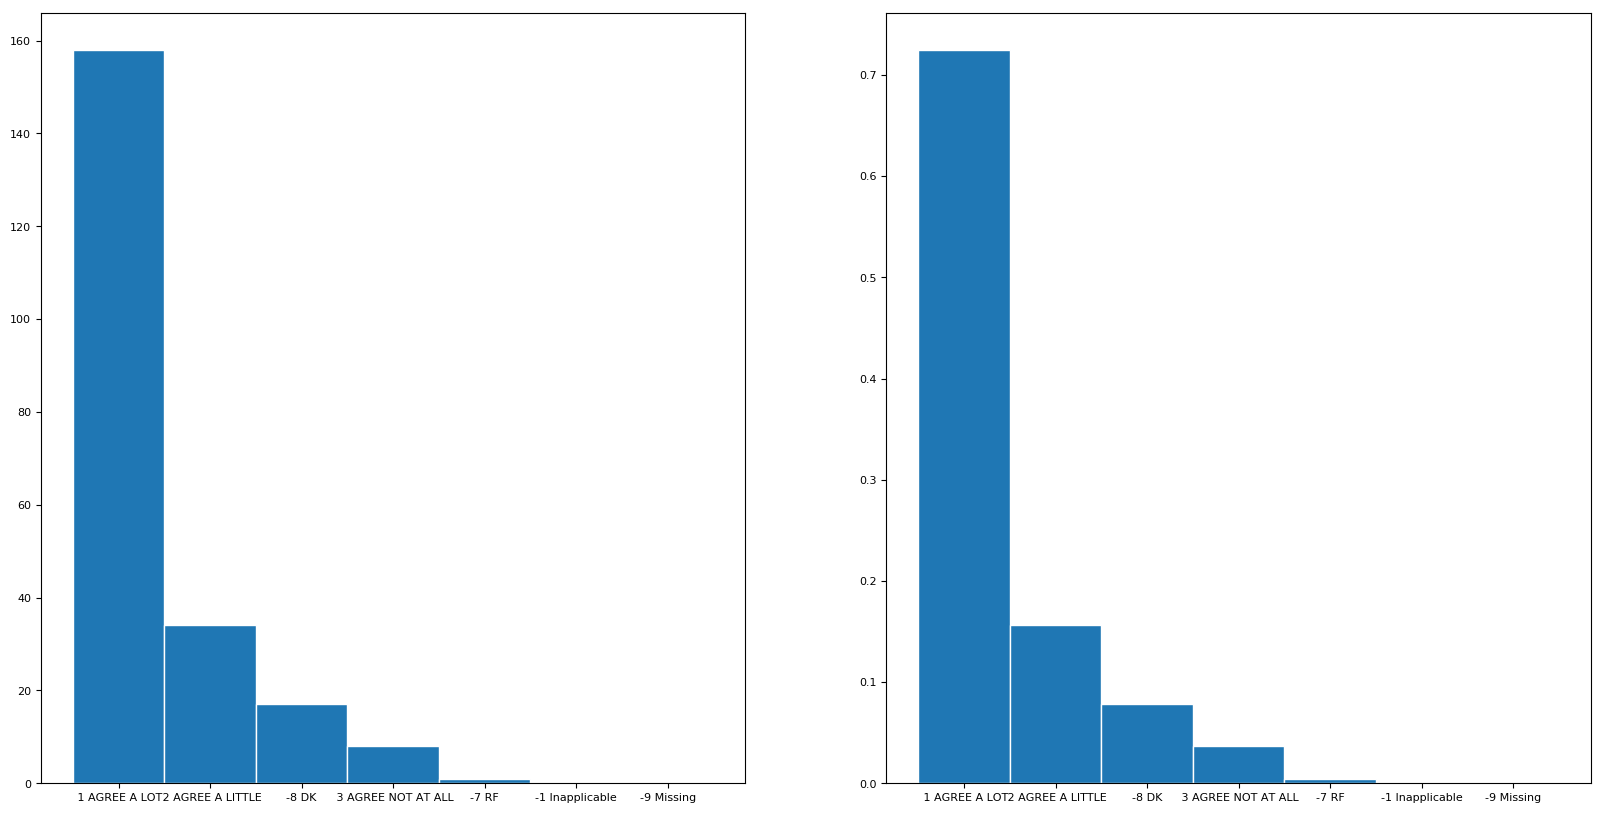

In [139]:
agent_type = 8
attr = 'wb1agrwstmt2'
target_agents = r1_valid[r1_valid['agent_type'] == agent_type]
value_counts = target_agents[attr].value_counts()
value_counts_pct = value_counts / value_counts.sum()
print(value_counts)
print(value_counts_pct)
hist(value_counts, 8)

In [27]:
attr_ = r1_valid[attr_head_]

def strip_number(attr_str):
    return ' '.join(attr_str.split()[2:])

attr_ = attr_.apply(strip_number)

In [36]:
value_counts = attr.value_counts()
value_counts_pct = attr.value_counts() / attr.value_counts().sum()

In [137]:
def hist(value_counts, labelsize = 10):
    value_counts_pct = value_counts / value_counts.sum()
    fig, axes = plt.subplots(1,2, figsize=(20, 10))
    width = 3
    x = np.arange(len(value_counts)) * width
    axes[0].bar(x, value_counts.values, width = width, edgecolor='white')
    axes[1].bar(x, value_counts_pct.values, width = width, edgecolor='white')
    for ax in axes:
        ax.tick_params(labelsize = labelsize)
    plt.setp(axes, xticks = x, xticklabels = [str(i) for i in value_counts.index.values])
    plt.show()

In [50]:
agent_type = 8


In [55]:
agent_type & 4

0

In [53]:
1 and 1

1

In [57]:
bool(3)

True

In [66]:
plt.rc('xtick',labelsize=16)

ages in nhats:
Index(['1 - 65-69', '2 - 70-74', '3 - 75-79', '4 - 80-84', '5 - 85-89',
       '6 - 90 +'],
      dtype='object')
genders in nhats:
Index(['1 MALE', '2 FEMALE'], dtype='object')
races in nhats:
Index([' 1 White, non-hispanic', ' 2 Black, non-hispanic',
       ' 3 Other (Am Indian/Asian/Native Hawaiian/Pacific Islander/other specify), non-Hispanic',
       ' 4 Hispanic', ' 5 more than one DKRF primary', ' 6 DKRF'],
      dtype='object')
dualigible in nhats:
Index(['-9 Missing', '-8 DK', '-7 RF', '-1 Inapplicable', ' 1 YES', ' 2 NO'], dtype='object')


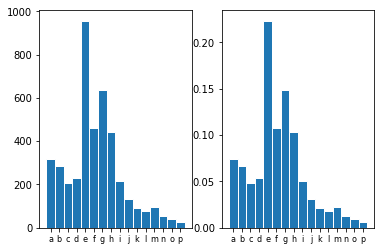

In [122]:
value_counts_pct = value_counts / value_counts.sum()
fig, axes = plt.subplots(1,2)
width = 3
x = np.arange(len(value_counts)) * width
axes[0].bar(x, value_counts.values, width = width, edgecolor='white')
axes[1].bar(x, value_counts_pct.values, width = width, edgecolor='white')
plt.setp(axes, xticks = x, xticklabels = [chr(x) for x in np.arange(ord('a'),ord('a') + 16)])
plt.rc('xtick',labelsize=16)
plt.show()

In [96]:
[str(i) for i in value_counts.index.values]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15']

In [106]:
[chr(x) for x in np.arange(ord('a'),ord('a') + 16)]

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p']

<h1 align = 'center'>generate table about each attribute for each type/bucket</h1>

In [3]:
r1 = pd.read_stata('R1\\NHATS_Round_1_SP_File.dta')
metro = pd.read_stata('NHATS_Round_1_6_MetNonmet.dta')

r1_metroind = metro[metro['r1dmetnonmet'] == metro['r1dmetnonmet'].cat.categories[1]][['spid','r1dmetnonmet']]

r1_metro = r1.merge(r1_metroind, on = 'spid')

r1_valid = r1_metro[(~r1_metro['hc1health'].isin(['-9 Missing', '-8 DK', '-1 Inapplicable']))].reset_index(drop = True)
r1_valid = r1_valid[r1_valid['is1resptype'] == '1 SAMPLE PERSON (SP)'].reset_index(drop = True)
r1_valid = r1_valid[(r1_valid['hc1disescn2'] == ' 1 YES') | (r1_valid['hc1disescn3'] == ' 1 YES') |
                    (r1_valid['hc1disescn6'] == ' 1 YES')].reset_index(drop = True)

In [4]:
def defType(row):
    if row['r1d2intvrage'] in ['1 - 65-69','2 - 70-74']:
        age = 1
    else:
        age = 0
    
    if row['r1dgender'] == '1 MALE':
        gender = 1
    else:
        gender = 0
    if row['rl1dracehisp'] == ' 1 White, non-hispanic':
        race = 1
    else:
        race = 0
    if row['ip1cmedicaid'] ==  ' 2 NO':
        dual_eligible = 0
    else:
        dual_eligible = 1
    return age + 2 * gender + 4 * race + 8 * dual_eligible
    
r1_valid['agent_type'] = r1_valid.apply(defType, axis = 1)

In [5]:
#1 : high; 2 : middle; 3: low
def categorize_inc(qt_75, qt_25, x):
    if isinstance(x, float):
        if x > qt_75:
            return 1
        elif x < qt_25:
            return 3
        else:
            return 2
    else:
        return x.split()[0]

def numerize_inc(col):
    have_num_val = col.apply(lambda x: isinstance(x, float))
    have_non_num_val = [not i for i in have_num_val]
    num_val = col[have_num_val].astype('float')
    qt_75 = num_val.quantile(.75)
    qt_25 = num_val.quantile(.25)
    print(qt_75,qt_25)
    return col.apply(lambda x: categorize_inc(qt_75, qt_25, x))

r1_valid['ia1totinc'] = numerize_inc(r1_valid['ia1totinc'])
r1_valid['ia1totinc'].value_counts()

52000.0 14000.0


2     1216
-8    1054
-7     810
1      602
3      597
Name: ia1totinc, dtype: int64

In [6]:
#1 : high; 2 : middle; 3: low
def categorize_edu(qt_75, qt_25, x):
    if x > 0:
        if x > qt_75:
            return 1
        elif x < qt_25:
            return 3
        else:
            return 2
    else:
        return x

def numerize_edu(col):
    col = col.apply(lambda x: x.split()[0]).astype('float')
    num_valid = col[col > 0]
    qt_75 = num_valid.quantile(.75)
    qt_25 = num_valid.quantile(.25)
    return col.apply(lambda x: categorize_edu(qt_75, qt_25, x))

r1_valid['el1higstschl'] = numerize_edu(r1_valid['el1higstschl'])
r1_valid['el1higstschl'].value_counts()

 2.0    2820
 1.0     917
 3.0     500
-8.0      38
-7.0       4
Name: el1higstschl, dtype: int64

In [7]:
def categorize_fnott(x):
    if x == 1:
        return 1
    else:
        return 2
    
def numerize_fnott(col):
    col = col.apply(lambda x: x.split()[0]).astype('float')
    return col.apply(categorize_fnott)
    

r1_valid['fl1noonetalk'] = numerize_fnott(r1_valid['fl1noonetalk'])
r1_valid['fl1noonetalk'].value_counts()

2    3991
1     288
Name: fl1noonetalk, dtype: int64

In [8]:
attrs = {'want-find-way-to':'wb1agrwstmt2', 'feel-cheerful':'wb1offelche1','feel-bored':'wb1offelche2',
         'feel-full-of-life':'wb1offelche3', 'feel-upset':'wb1offelche4', 'adjust-to-change':'wb1agrwstmt3',
         'self-determin':'wb1agrwstmt1', 'know-each-other':'cm1knowwell', 'willing-help-each-other' : 'cm1willnghlp',
         'can-be-trusted':'cm1peoptrstd', 'no-one-talk-to':'fl1noonetalk', 'income':'ia1totinc', 'education':'el1higstschl'}

def numerize(key, col):
    if key in ('no-one-talk-to','income','education'):
        value = col.astype('int32')
    else:
        value = col.apply(lambda x: x.split()[0]).astype('int32')
    return value.where((value > 0) & (value < 10))

def calc_ratio(col, d):
    ratio = col.value_counts()/col.value_counts().sum()
    ratio.index = -ratio.index + d
    ratio = ratio.sort_index()
    result = []
    for (num, rate) in zip(ratio.index, ratio.values):
        result.extend([num,rate])
    return result

final_result = []
for ((key, value),order) in zip(attrs.items(), range(len(attrs))):
    col_whole = numerize(key, r1_valid[value])
    valid_value = [i for i in col_whole.value_counts().index if not isinstance(i,str) and i > 0]
    d = max(valid_value) + min(valid_value)
    for agent_type in range(16):
        ratio_for_this_par = [agent_type, key, value, order]
        col = col_whole[r1_valid.agent_type == agent_type]
        ratio_for_this_par.extend(calc_ratio(col, d))
        final_result.append(ratio_for_this_par)

In [9]:
nhats_attr_each_type = pd.DataFrame(final_result, columns = ['type','attr_name','attr_var','attr_order','value1',
                                                             'prob1','value2','prob2','value3','prob3','value4',
                                                             'prob4','value5','prob5']).sort_values(by = ['type','attr_order'])

nhats_attr_each_type.to_csv('nhats_attr_each_type.csv', index = False)

<h1 align = "center"> Generate normalize factor </h1>

In [13]:
attitude = ["want-find-way-to", "feel-cheerful", "feel-bored", "feel-full-of-life", "feel-upset"]
social = ["know-each-other", "willing-help-each-other", "can-be-trusted", "self-determin", "adjust-to-change", "no-one-talk-to"]
efficacy = ["income", "education"]

In [18]:
print("attitude = want-find-way-to + feel-cheerful - feel-bored + feel-full-of-life - feel-upset")
for item in attitude:
    print(item)
    print("max:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].max().max())
    print("min:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].min().min())

attitude = want-find-way-to + feel-cheerful - feel-bored + feel-full-of-life - feel-upset
want-find-way-to
max:
3.0
min:
1.0
feel-cheerful
max:
5.0
min:
1.0
feel-bored
max:
5.0
min:
1.0
feel-full-of-life
max:
5.0
min:
1.0
feel-upset
max:
5.0
min:
1.0


In [20]:
print("social = know-each-other + willing-help-each-other + can-be-trusted - self-determin + adjust-to-change - no-one-talk-to")
for item in social:
    print(item)
    print("max:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].max().max())
    print("min:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].min().min())

social = know-each-other + willing-help-each-other + can-be-trusted - self-determin + adjust-to-change - no-one-talk-to
know-each-other
max:
3.0
min:
1.0
willing-help-each-other
max:
3.0
min:
1.0
can-be-trusted
max:
3.0
min:
1.0
self-determin
max:
3.0
min:
1.0
adjust-to-change
max:
3.0
min:
1.0
no-one-talk-to
max:
2.0
min:
1.0


In [21]:
print("efficacy = income + education")
for item in efficacy:
    print(item)
    print("max:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].max().max())
    print("min:")
    print(nhats_attr_each_type[nhats_attr_each_type['attr_name'] == item][['value1','value2','value3','value4','value5']].min().min())

efficacy = income + education
income
max:
3.0
min:
1.0
education
max:
3.0
min:
1.0


In [23]:
att_max = 11
att_min = -7
soc_max = 10
soc_min = -1
eff_max = 6
eff_min = 2
att_norm = {'term':'attitude','factor': 1/(att_max - att_min),'intercept': -att_min/(att_max - att_min)}
soc_norm = {'term':'social_norm','factor': 1/(soc_max - soc_min),'intercept': -soc_min/(soc_max - soc_min)}
eff_norm = {'term':'attitude','factor': 1/(eff_max - eff_min),'intercept': -eff_min/(eff_max - eff_min)}
norms = [att_norm, soc_norm, eff_norm]
nomalize_factors = pd.DataFrame(columns = ['term', 'factor', 'intercept'])
for item in norms:
    nomalize_factors = nomalize_factors.append(item, ignore_index=True)

nomalize_factors

,term,factor,intercept
0,attitude,0.055556,0.388889
1,social_norm,0.090909,0.090909
2,attitude,0.250000,-0.500000


normalized = factor * attitude/social/efficacy + intercept

In [24]:
nomalize_factors.to_csv('normalize_factors.csv', index = False)

<h1 align = "center"> Mapping of dependent variables and independent variables </h1>

In [4]:
r1 = pd.read_stata('R1\\NHATS_Round_1_SP_File.dta')
metro = pd.read_stata('NHATS_Round_1_6_MetNonmet.dta')

r1_metroind = metro[metro['r1dmetnonmet'] == metro['r1dmetnonmet'].cat.categories[1]][['spid','r1dmetnonmet']]

r1_metro = r1.merge(r1_metroind, on = 'spid')

r1_valid = r1_metro[(~r1_metro['hc1health'].isin(['-9 Missing', '-8 DK', '-1 Inapplicable']))].reset_index(drop = True)
r1_valid = r1_valid[r1_valid['is1resptype'] == '1 SAMPLE PERSON (SP)'].reset_index(drop = True)
r1_valid = r1_valid[(r1_valid['hc1disescn2'] == ' 1 YES') | (r1_valid['hc1disescn3'] == ' 1 YES') |
                    (r1_valid['hc1disescn6'] == ' 1 YES')].reset_index(drop = True)

In [5]:
def defType(row):
    if row['r1d2intvrage'] in ['1 - 65-69','2 - 70-74']:
        age = 1
    else:
        age = 0
    
    if row['r1dgender'] == '1 MALE':
        gender = 1
    else:
        gender = 0
    if row['rl1dracehisp'] == ' 1 White, non-hispanic':
        race = 1
    else:
        race = 0
    if row['ip1cmedicaid'] ==  ' 2 NO':
        dual_eligible = 0
    else:
        dual_eligible = 1
    return age + 2 * gender + 4 * race + 8 * dual_eligible
    
r1_valid['agent_type'] = r1_valid.apply(defType, axis = 1)

In [6]:
#1 : high; 2 : middle; 3: low
def categorize_inc(qt_75, qt_25, x):
    if isinstance(x, float):
        if x > qt_75:
            return 1
        elif x < qt_25:
            return 3
        else:
            return 2
    else:
        return x.split()[0]

def numerize_inc(col):
    have_num_val = col.apply(lambda x: isinstance(x, float))
    have_non_num_val = [not i for i in have_num_val]
    num_val = col[have_num_val].astype('float')
    qt_75 = num_val.quantile(.75)
    qt_25 = num_val.quantile(.25)
    print(qt_75,qt_25)
    return col.apply(lambda x: categorize_inc(qt_75, qt_25, x))

r1_valid['ia1totinc'] = numerize_inc(r1_valid['ia1totinc'])
r1_valid['ia1totinc'].value_counts()

52000.0 14000.0


2     1216
-8    1054
-7     810
1      602
3      597
Name: ia1totinc, dtype: int64

In [7]:
#1 : high; 2 : middle; 3: low
def categorize_edu(qt_75, qt_25, x):
    if x > 0:
        if x > qt_75:
            return 1
        elif x < qt_25:
            return 3
        else:
            return 2
    else:
        return x

def numerize_edu(col):
    col = col.apply(lambda x: x.split()[0]).astype('float')
    num_valid = col[col > 0]
    qt_75 = num_valid.quantile(.75)
    qt_25 = num_valid.quantile(.25)
    return col.apply(lambda x: categorize_edu(qt_75, qt_25, x))

r1_valid['el1higstschl'] = numerize_edu(r1_valid['el1higstschl'])
r1_valid['el1higstschl'].value_counts()

 2.0    2820
 1.0     917
 3.0     500
-8.0      38
-7.0       4
Name: el1higstschl, dtype: int64

In [8]:
def categorize_fnott(x):
    if x == 1:
        return 1
    else:
        return 2
    
def numerize_fnott(col):
    col = col.apply(lambda x: x.split()[0]).astype('float')
    return col.apply(categorize_fnott)
    

r1_valid['fl1noonetalk'] = numerize_fnott(r1_valid['fl1noonetalk'])
r1_valid['fl1noonetalk'].value_counts()

2    3991
1     288
Name: fl1noonetalk, dtype: int64

In [40]:
attrs = {'want-find-way-to':'wb1agrwstmt2', 'feel-cheerful':'wb1offelche1','feel-bored':'wb1offelche2',
         'feel-full-of-life':'wb1offelche3', 'feel-upset':'wb1offelche4', 'adjust-to-change':'wb1agrwstmt3',
         'self-determin':'wb1agrwstmt1', 'know-each-other':'cm1knowwell', 'willing-help-each-other' : 'cm1willnghlp',
         'can-be-trusted':'cm1peoptrstd', 'no-one-talk-to':'fl1noonetalk', 'income':'ia1totinc', 'education':'el1higstschl'}

def numerize(key, col):
    if key in ('no-one-talk-to','income','education'):
        value = col.astype('int32')
    else:
        value = col.apply(lambda x: x.split()[0]).astype('int32')
    return value.where((value > 0) & (value < 10))

def calc_ratio(col, d):
    values = col.value_counts().index
    values = -values + d
    ratio = ratio.sort_index()
    result = []
    for (num, rate) in zip(ratio.index, ratio.values):
        result.extend([num,rate])
    return result

final_result = pd.DataFrame()

for (key, value) in attrs.items():
    col_whole = numerize(key, r1_valid[value])
    valid_value = [i for i in col_whole.value_counts().index if not isinstance(i,str) and i > 0]
    d = max(valid_value) + min(valid_value)
    valid_value = [-i + d for i in valid_value]
    pair = list(zip(sorted(valid_value), sorted(valid_value, reverse = True)))
    one_attr = pd.DataFrame({'attr_name': [key], 'attr_var': [value], 'nvalues': [len(valid_value)]})
    for i in range(len(valid_value)):
        one_attr = pd.concat([one_attr, pd.DataFrame({'value_' + repr(i) : [pair[i][0]], 'map_value_' + repr(i) : [pair[i][1]]})], axis = 1, sort = False)
    final_result = final_result.append(one_attr, sort = False)

In [42]:
final_result.to_csv('nhats_attr_map.csv', index = False)

In [22]:
pd.DataFrame({'z':[1],'a':[2]})

,z,a
0,1,2


In [39]:
pd.concat((pd.DataFrame({'a':[1,2]}), pd.DataFrame({'b':[1,2]})), axis = 1)

,a,b
0,1,1
1,2,2
